In [1]:
from keras.datasets import reuters


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)
print(len(test_data))
print(len(train_data))

2246
8982


In [2]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [3]:
word_index = reuters.get_word_index()
reverse_word_indes = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_indes.get(i - 3, "?") for i in train_data[0]])
# WARNING, that the indices are offset by 3 because 0, 1, and 2 are reserved
# indices for "padding", "start of sequence", and "unknown"

In [4]:
print(f"label associated wity this data: {train_labels[0]}")
print(decoded_newswire)

label associated wity this data: 3
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [5]:
import numpy as np


def vectorize_sequences(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
def to_one_hot(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
# to do the same by built-in way.
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(units=64, activation="relu", input_shape=(10_000,)))
model.add(layers.Dense(units=64, activation="relu"))
model.add(layers.Dense(units=46, activation="softmax"))

In [8]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
x_val = x_train[:1_000]
partial_x_train = x_train[1_000:]

y_val = one_hot_train_labels[:1_000]
partial_y_train = one_hot_train_labels[1_000:]

In [10]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 7s 81ms/step - loss: 2.6208 - accuracy: 0.5712 - val_loss: 1.7152 - val_accuracy: 0.6570
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.4064 - accuracy: 0.7171 - val_loss: 1.2739 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0344 - accuracy: 0.7788 - val_loss: 1.1153 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8188 - accuracy: 0.8212 - val_loss: 1.0171 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6609 - accuracy: 0.8597 - val_loss: 0.9580 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5311 - accuracy: 0.8889 - val_loss: 0.9430 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4289 - accuracy: 0.9107 - val_loss: 0.9171 - val_accuracy: 0.8060
Epoch 8/20
16

20
20
20


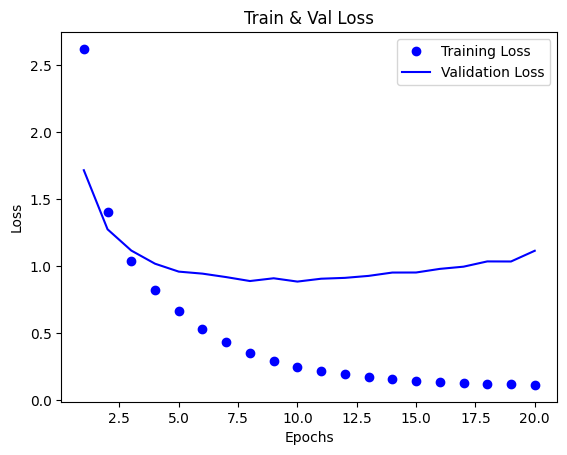

In [16]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Train & Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

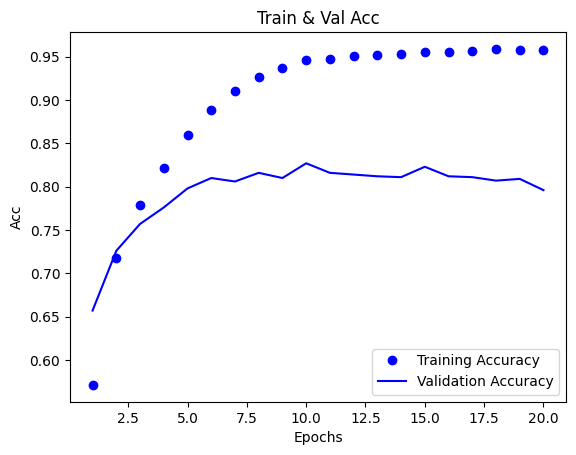

In [17]:
# to clear figure:
# plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Train & Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [18]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 6ms/step - loss: 1.2328 - accuracy: 0.7876
[1.2328134775161743, 0.7876224517822266]


# Compare results with a random baseline

In [19]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(float(np.sum(hits_array) / len(test_labels)))

0.18655387355298308


# Generating predictions on new data

In [20]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

71/71 [==============================] - 0s 4ms/step
(46,)
0.9999998
3


# A different way to handle the labels and the loss
'categorical_crossentropy' -- expects the labels to follow a categorical encoding
'sparse_categorical_crossentropy' -- for integer labels. This new loss function is still mathematically the same as 'categorical_crossentropy' it just has a different interface.

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

# The importance of having sufficiently large intermediate layers

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(units=64, activation="relu", input_shape=(10_000,)))
model.add(layers.Dense(units=4, activation="relu")) # here set much smaller intermediate layer
model.add(layers.Dense(units=46, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 3.5887 - accuracy: 0.2082 - val_loss: 3.3547 - val_accuracy: 0.2430
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 3.2081 - accuracy: 0.2285 - val_loss: 3.0951 - val_accuracy: 0.2350
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 2.9538 - accuracy: 0.2293 - val_loss: 2.9112 - val_accuracy: 0.2330
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 2.7558 - accuracy: 0.2377 - val_loss: 2.7644 - val_accuracy: 0.2350
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 2.5731 - accuracy: 0.2467 - val_loss: 2.6002 - val_accuracy: 0.2390
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 2.3822 - accuracy: 0.2548 - val_loss: 2.4233 - val_accuracy: 0.2440
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 2.1672 - accuracy: 0.2695 - val_loss: 2.2182 - val_accuracy: 0.2680
Epoch 8/20
16

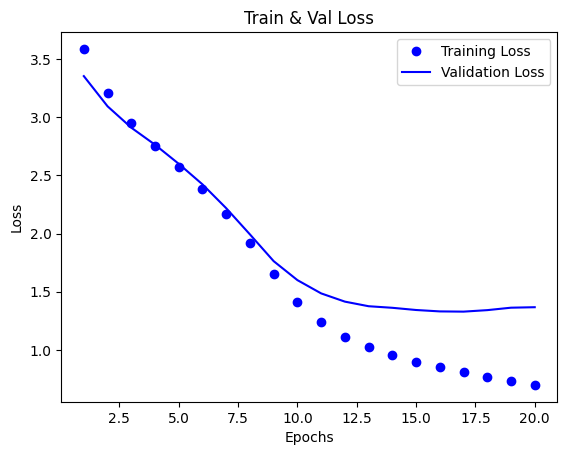

In [22]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Train & Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

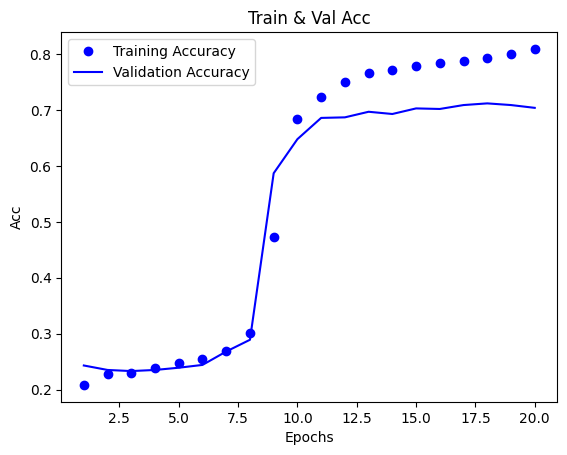

In [23]:
# to clear figure:
# plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Train & Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [24]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 5ms/step - loss: 1.4610 - accuracy: 0.6861
[1.4610321521759033, 0.6861086487770081]


# Try using larger layers: 128 units.

In [25]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(units=128, activation="relu", input_shape=(10_000,)))
model.add(layers.Dense(units=128, activation="relu"))
model.add(layers.Dense(units=46, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 2.1706 - accuracy: 0.5705 - val_loss: 1.3705 - val_accuracy: 0.6960
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0918 - accuracy: 0.7674 - val_loss: 1.0781 - val_accuracy: 0.7650
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7640 - accuracy: 0.8375 - val_loss: 1.0265 - val_accuracy: 0.7680
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5468 - accuracy: 0.8881 - val_loss: 0.9465 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4055 - accuracy: 0.9141 - val_loss: 0.9292 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.3111 - accuracy: 0.9310 - val_loss: 0.8470 - val_accuracy: 0.8320
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.2539 - accuracy: 0.9421 - val_loss: 0.8644 - val_accuracy: 0.8260
Epoch 8/20
16

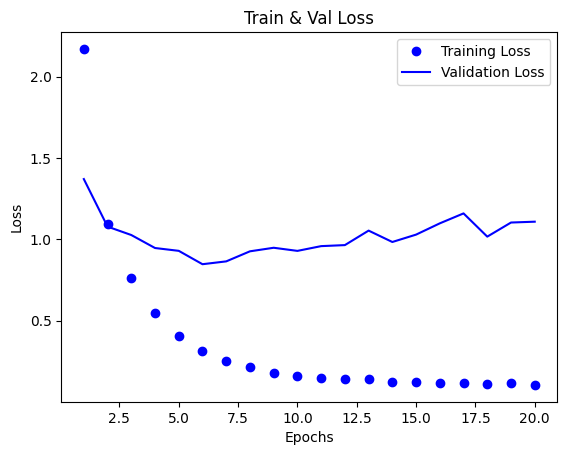

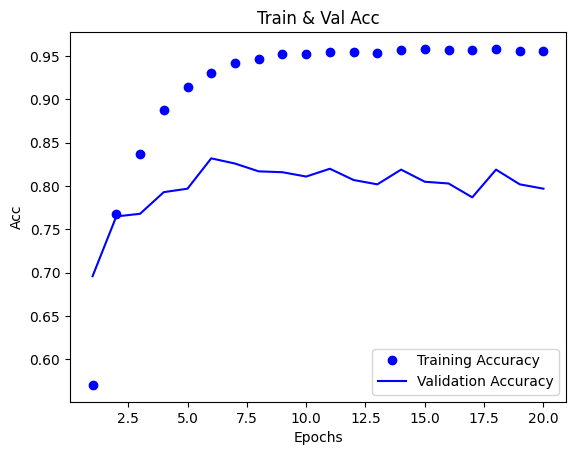

In [26]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Train & Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# to clear figure:
# plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Train & Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [27]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 6ms/step - loss: 1.3364 - accuracy: 0.7850
[1.3363523483276367, 0.7849510312080383]


# Try using smaller layers: 32 units.

In [28]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(units=32, activation="relu", input_shape=(10_000,)))
model.add(layers.Dense(units=32, activation="relu"))
model.add(layers.Dense(units=46, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 3.0693 - accuracy: 0.4723 - val_loss: 2.3731 - val_accuracy: 0.5820
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.9865 - accuracy: 0.6351 - val_loss: 1.7175 - val_accuracy: 0.6380
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.4757 - accuracy: 0.7050 - val_loss: 1.4112 - val_accuracy: 0.7030
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 1.2041 - accuracy: 0.7519 - val_loss: 1.2581 - val_accuracy: 0.7240
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0248 - accuracy: 0.7868 - val_loss: 1.1641 - val_accuracy: 0.7510
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8889 - accuracy: 0.8148 - val_loss: 1.0968 - val_accuracy: 0.7680
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7722 - accuracy: 0.8388 - val_loss: 1.0519 - val_accuracy: 0.7820
Epoch 8/20
16

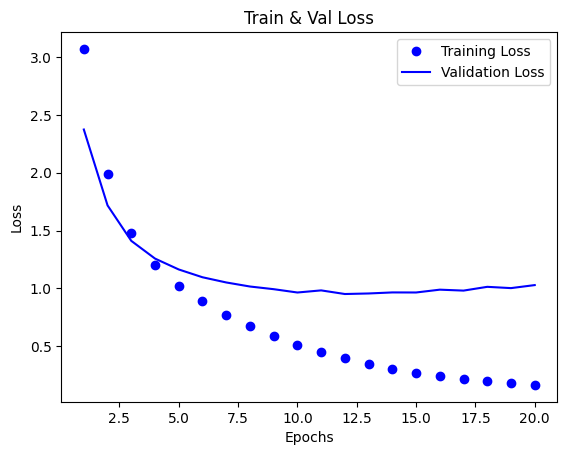

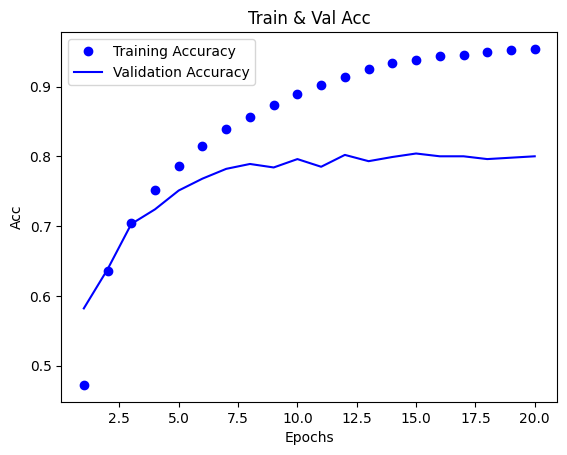

In [29]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Train & Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# to clear figure:
# plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Train & Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [30]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 5ms/step - loss: 1.1300 - accuracy: 0.7774
[1.1299999952316284, 0.7773820161819458]


# Try using more hidden layers

In [31]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(units=64, activation="relu", input_shape=(10_000,)))
model.add(layers.Dense(units=64, activation="relu"))
model.add(layers.Dense(units=64, activation="relu"))
model.add(layers.Dense(units=64, activation="relu"))
model.add(layers.Dense(units=46, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 2.5501 - accuracy: 0.4589 - val_loss: 1.6864 - val_accuracy: 0.6140
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4860 - accuracy: 0.6553 - val_loss: 1.3552 - val_accuracy: 0.6990
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.1414 - accuracy: 0.7375 - val_loss: 1.2174 - val_accuracy: 0.7130
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.9264 - accuracy: 0.7824 - val_loss: 1.1077 - val_accuracy: 0.7560
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.7485 - accuracy: 0.8254 - val_loss: 1.0545 - val_accuracy: 0.7700
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6314 - accuracy: 0.8454 - val_loss: 1.0273 - val_accuracy: 0.7730
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5165 - accuracy: 0.8777 - val_loss: 1.0734 - val_accuracy: 0.7700
Epoch 8/20
16

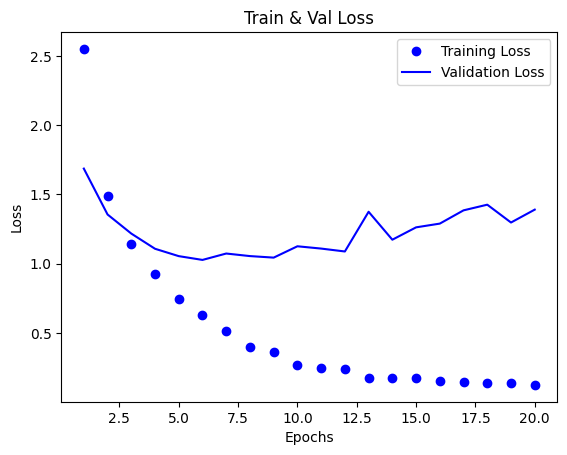

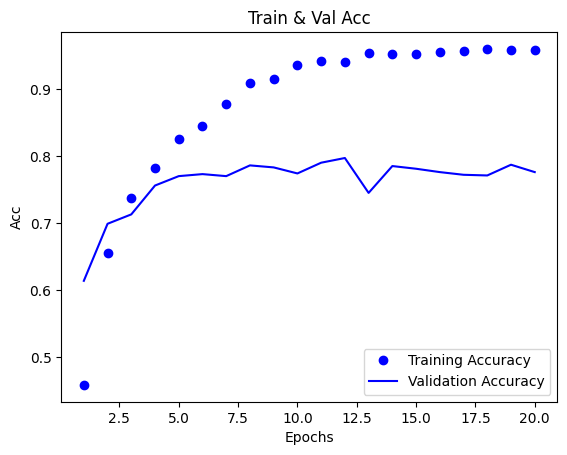

In [32]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Train & Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# to clear figure:
# plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Train & Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [33]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 6ms/step - loss: 1.6866 - accuracy: 0.7560
[1.6865991353988647, 0.7560107111930847]


# Try using less hidden layers

In [34]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(units=64, activation="relu", input_shape=(10_000,)))
model.add(layers.Dense(units=46, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 30ms/step - loss: 2.5261 - accuracy: 0.5807 - val_loss: 1.7384 - val_accuracy: 0.6760
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.4035 - accuracy: 0.7339 - val_loss: 1.3023 - val_accuracy: 0.7290
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0317 - accuracy: 0.7912 - val_loss: 1.1162 - val_accuracy: 0.7770
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8111 - accuracy: 0.8363 - val_loss: 1.0166 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6537 - accuracy: 0.8738 - val_loss: 0.9263 - val_accuracy: 0.8090
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5374 - accuracy: 0.8949 - val_loss: 0.8781 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4433 - accuracy: 0.9110 - val_loss: 0.8551 - val_accuracy: 0.8240
Epoch 8/20
16

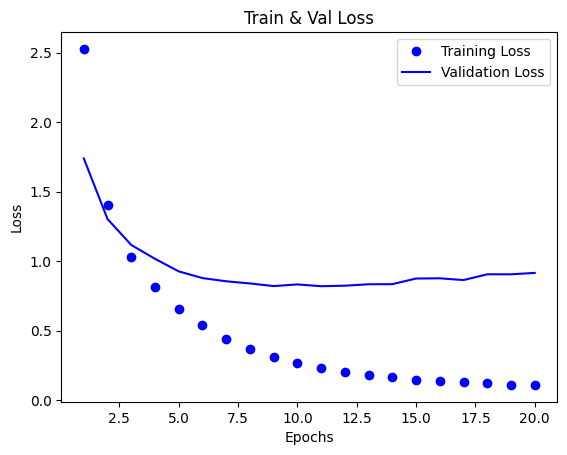

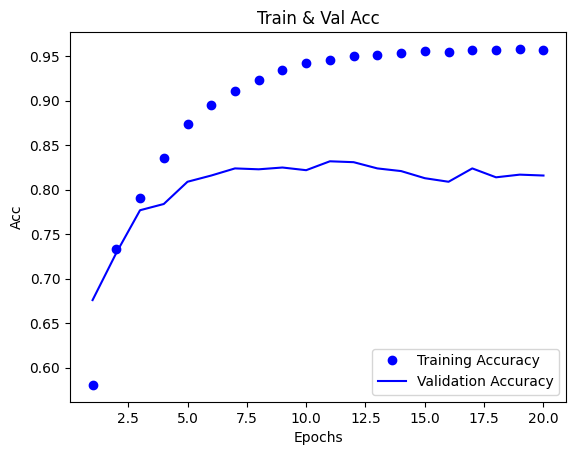

In [35]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Train & Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# to clear figure:
# plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Train & Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [36]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 5ms/step - loss: 1.0520 - accuracy: 0.7974
[1.052047848701477, 0.7974176406860352]
